# SPRINT 1

#  1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import nltk

In [2]:
# Download NLTK resources if not already available
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sidba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sidba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Step 1: Load the dataset

In [3]:
data = pd.read_csv('IMDB Dataset.csv')

In [4]:
# Display the first few rows of the dataset
print(data.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [5]:
# Check the structure and missing values in the dataset
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
review       0
sentiment    0
dtype: int64


# Step 2: Data Cleaning

In [6]:
# Remove HTML tags, special characters, and convert text to lowercase
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

In [7]:
data['review'] = data['review'].apply(clean_text)

In [8]:
# Display cleaned data
print(data.head())

                                              review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production the filming tech...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically theres a family where a little boy j...  negative
4  petter matteis love in the time of money is a ...  positive


# Step 3: Tokenization 

In [9]:
# Tokenize the cleaned reviews
data['tokens'] = data['review'].apply(word_tokenize)

In [10]:
# Display tokenized reviews
print(data[['review', 'tokens']].head())

                                              review  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production the filming tech...   
2  i thought this was a wonderful way to spend ti...   
3  basically theres a family where a little boy j...   
4  petter matteis love in the time of money is a ...   

                                              tokens  
0  [one, of, the, other, reviewers, has, mentione...  
1  [a, wonderful, little, production, the, filmin...  
2  [i, thought, this, was, a, wonderful, way, to,...  
3  [basically, theres, a, family, where, a, littl...  
4  [petter, matteis, love, in, the, time, of, mon...  


# Step 4: Remove Stopwords

In [11]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

data['tokens'] = data['tokens'].apply(remove_stopwords)


In [12]:
# Join tokens back to form sentences (optional, depending on model input requirements)
data['processed_review'] = data['tokens'].apply(lambda tokens: ' '.join(tokens))

In [13]:
# Display processed reviews
print(data[['review', 'processed_review']].head())

                                              review  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production the filming tech...   
2  i thought this was a wonderful way to spend ti...   
3  basically theres a family where a little boy j...   
4  petter matteis love in the time of money is a ...   

                                    processed_review  
0  one reviewers mentioned watching oz episode yo...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically theres family little boy jake thinks...  
4  petter matteis love time money visually stunni...  


# Step 5: TF-IDF Feature Extraction

In [14]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  

In [15]:
# Apply TF-IDF to the processed reviews
X = tfidf_vectorizer.fit_transform(data['processed_review'])

In [16]:
# Extract labels (sentiments)
y = data['sentiment'].apply(lambda sentiment: 1 if sentiment == 'positive' else 0)

In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Display TF-IDF matrix shape
print("TF-IDF Matrix Shape:", X.shape)

TF-IDF Matrix Shape: (50000, 5000)


# Step 6: Save Preprocessed Data 

In [19]:
data.to_csv('cleaned_IMDB_Dataset_with_Tokens.csv', index=False)

# SPRINT 2

# Import necessary libraries

In [20]:
import numpy as np
import pandas as pd
!pip install xgboost
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Load the dataset
df = pd.read_csv('IMDB Dataset.csv')

# Model Building

In [32]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentiment'])  # 'negative' -> 0, 'positive' -> 1

# Data split
X = df['review']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Define classifiers with pipelines
classifiers = {
    "Logistic Regression": Pipeline([
        ('tfidf', TfidfVectorizer(max_features=2500, stop_words='english', ngram_range=(1, 2))),
        ('clf', LogisticRegression(max_iter=1000))
    ]),
    "Multinomial Naive Bayes": Pipeline([
        ('tfidf', TfidfVectorizer(max_features=2500, stop_words='english', ngram_range=(1, 2))),
        ('clf', MultinomialNB())
    ]),
    "Linear SVC": Pipeline([
        ('tfidf', TfidfVectorizer(max_features=2500, stop_words='english', ngram_range=(1, 2))),
        ('clf', LinearSVC())
    ]),
    "Random Forest": Pipeline([
        ('tfidf', TfidfVectorizer(max_features=2500, stop_words='english', ngram_range=(1, 2))),
        ('clf', RandomForestClassifier())
    ]),
    "Gradient Boosting": Pipeline([
        ('tfidf', TfidfVectorizer(max_features=2500, stop_words='english', ngram_range=(1, 2))),
        ('clf', GradientBoostingClassifier())
    ]),
    "XGBoost": Pipeline([
        ('tfidf', TfidfVectorizer(max_features=2500, stop_words='english', ngram_range=(1, 2))),
        ('clf', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
    ])
}

In [34]:
# Train and evaluate each classifier
results = []
confusion_matrices = {}

for name, pipeline in classifiers.items():
    print(f"Training and evaluating: {name}")
    
    # Train the pipeline
    pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline.named_steps['clf'], "predict_proba") else None
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm
    results.append((name, acc))

Training and evaluating: Logistic Regression
Training and evaluating: Multinomial Naive Bayes
Training and evaluating: Linear SVC
Training and evaluating: Random Forest
Training and evaluating: Gradient Boosting
Training and evaluating: XGBoost


C:\Users\sidba\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:03:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\sidba\anaconda3\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [35]:
print(f"Accuracy for {name}: {acc:.2f}")

Accuracy for XGBoost: 0.81


In [36]:
 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.75      0.80      4961
           1       0.78      0.86      0.82      5039

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



In [37]:
if y_prob is not None:
        auc = roc_auc_score(y_test, y_prob)
        print(f"AUC Score for {name}: {auc:.2f}")

AUC Score for XGBoost: 0.90


In [38]:
# Compare Results
results_df = pd.DataFrame(results, columns=["Classifier", "Accuracy"])
print("\nComparison of Classifier Performance:")
print(results_df)


Comparison of Classifier Performance:
                Classifier  Accuracy
0      Logistic Regression    0.8822
1  Multinomial Naive Bayes    0.8525
2               Linear SVC    0.8801
3            Random Forest    0.8449
4        Gradient Boosting    0.8088


Confusion Matrix for Logistic Regression: 
[[4306  655]
 [ 523 4516]]
Confusion Matrix for Multinomial Naive Bayes: 
[[4132  829]
 [ 646 4393]]
Confusion Matrix for Linear SVC: 
[[4322  639]
 [ 560 4479]]
Confusion Matrix for Random Forest: 
[[4226  735]
 [ 816 4223]]
Confusion Matrix for Gradient Boosting: 
[[3734 1227]
 [ 685 4354]]


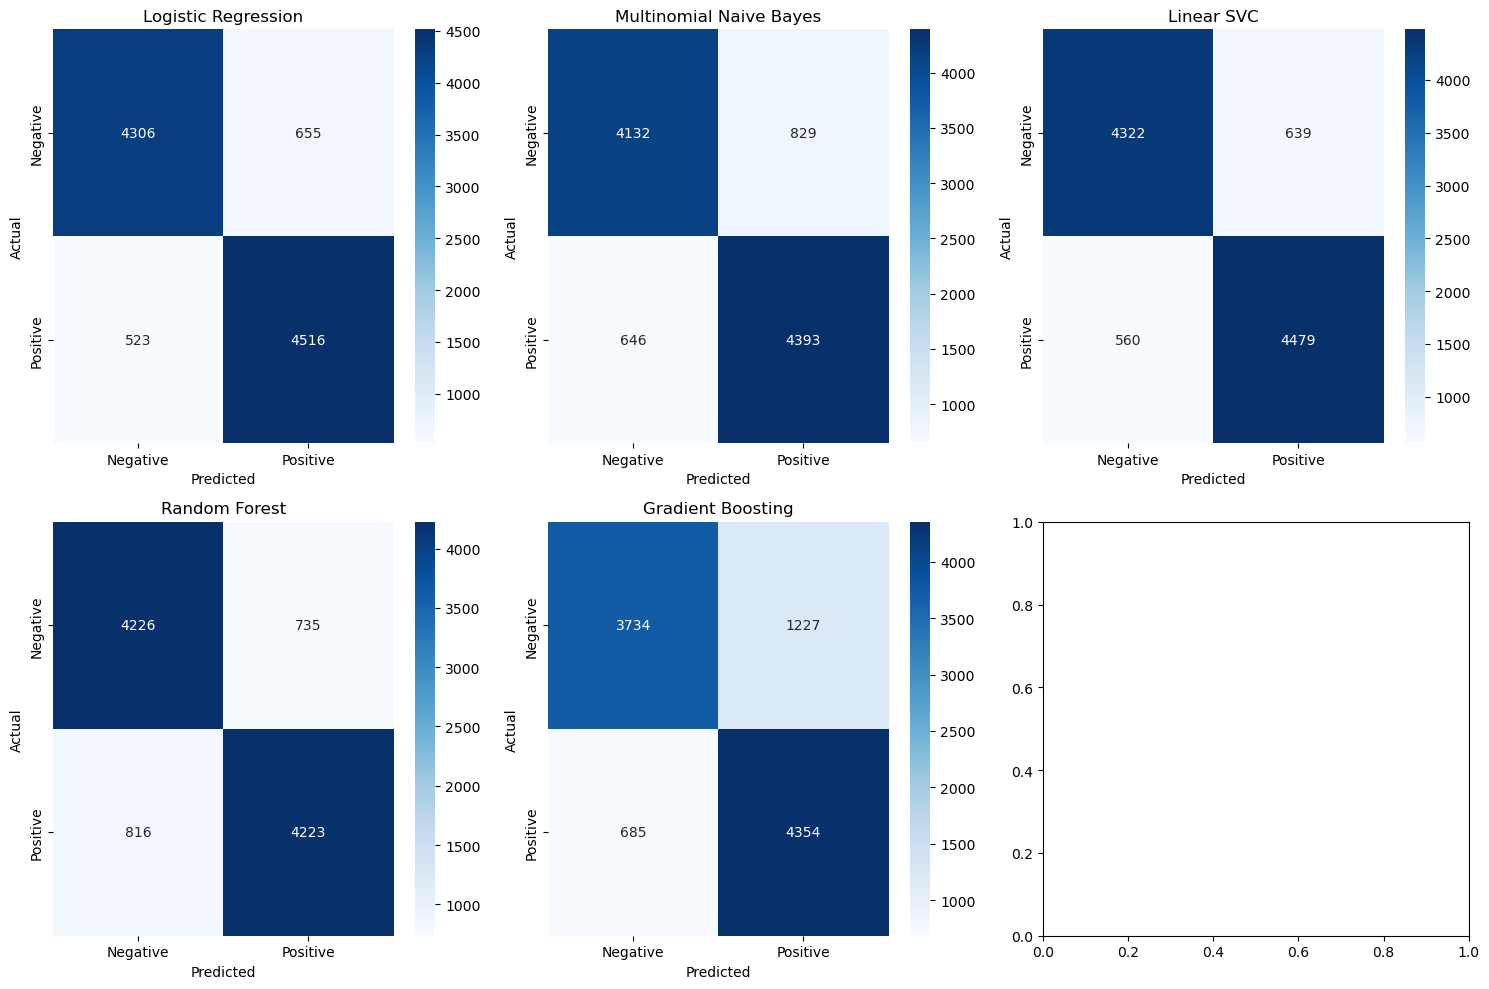

In [40]:
# Visualize Confusion Matrices
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (name, cm) in enumerate(confusion_matrices.items()):
    print(f"Confusion Matrix for {name}: \n{cm}")  # Debug print
    
    # Ensure the confusion matrix is 2x2 for binary classification
    if cm.shape == (2, 2):
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[i])
        axes[i].set_title(name)
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')
    else:
        print(f"Confusion Matrix for {name} is not 2x2: {cm.shape}")

plt.tight_layout()
plt.show()

C:\Users\sidba\anaconda3\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

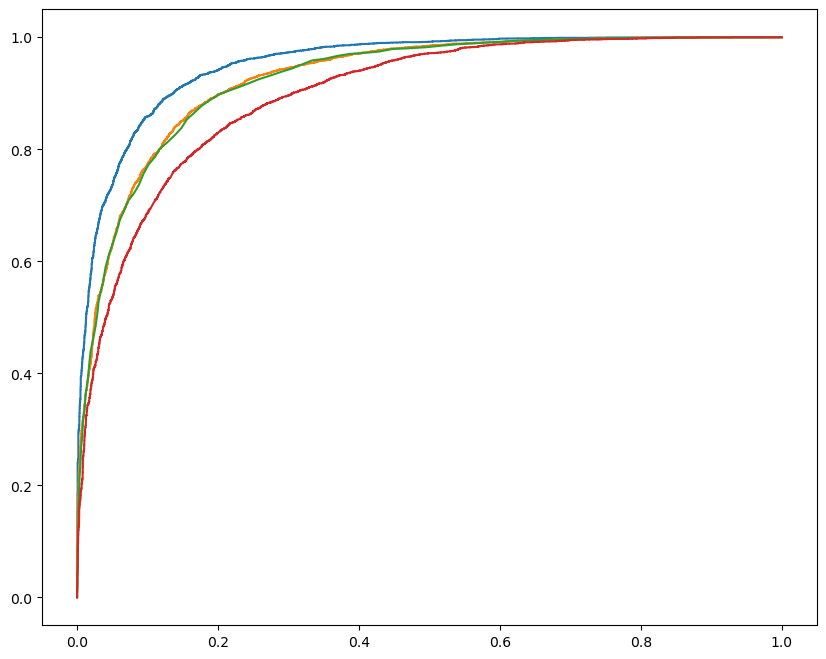

In [41]:
# Plot ROC Curve for all classifiers
plt.figure(figsize=(10, 8))

for name, pipeline in classifiers.items():
    if hasattr(pipeline.named_steps['clf'], "predict_proba"):
        y_prob = pipeline.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

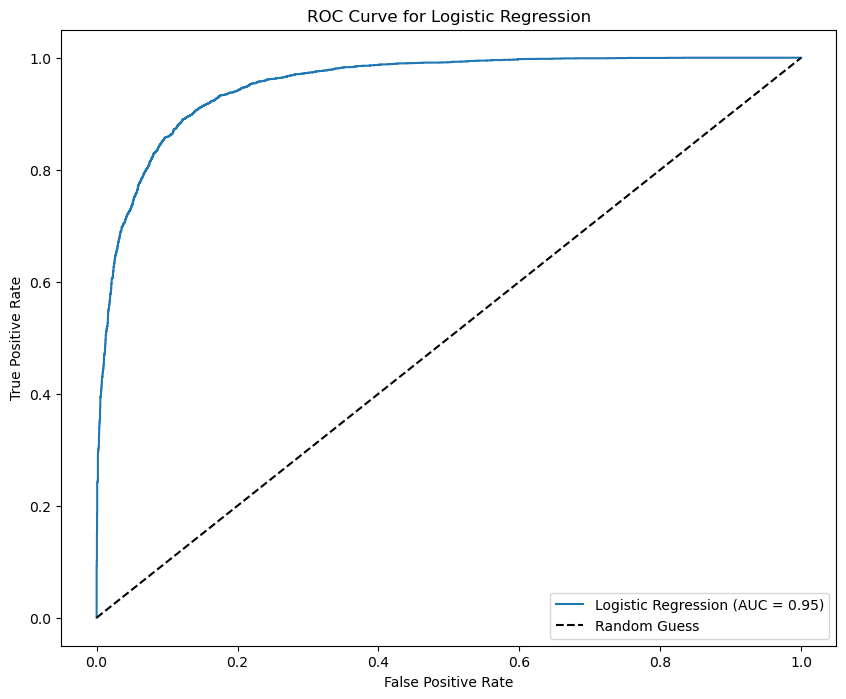

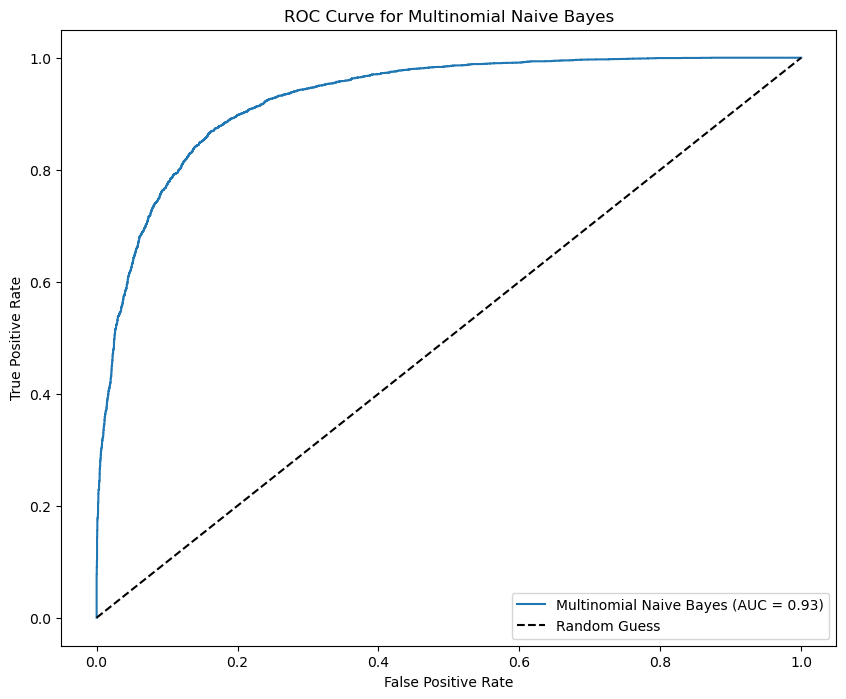

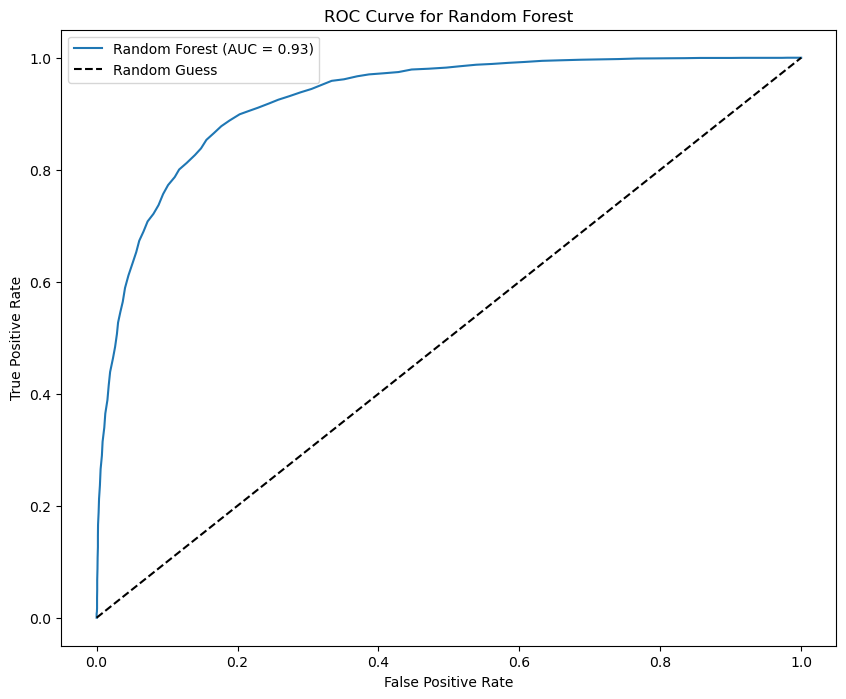

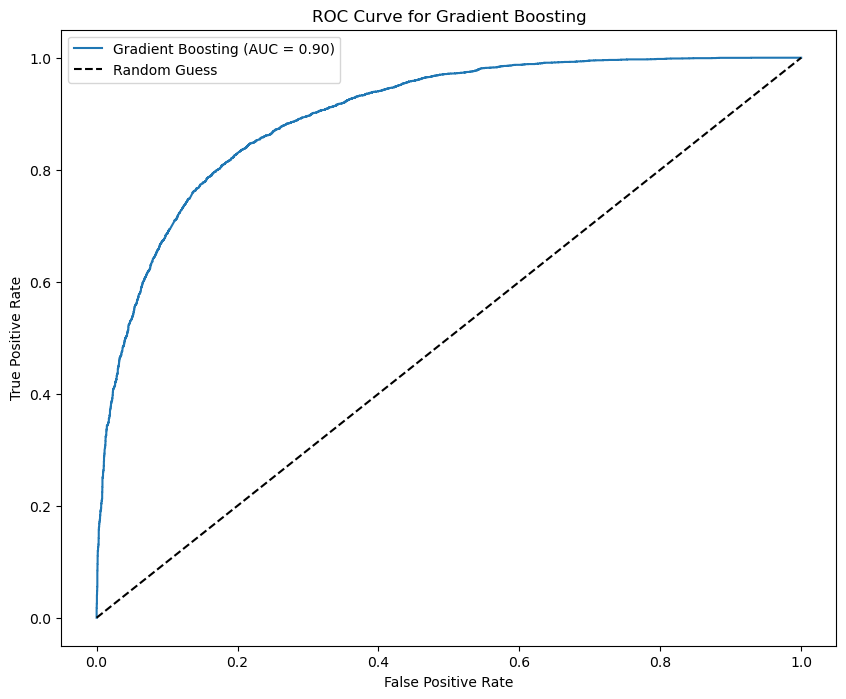

C:\Users\sidba\anaconda3\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

<Figure size 1000x800 with 0 Axes>

In [42]:
# Plot ROC Curve for each classifier individually
for name, pipeline in classifiers.items():
    if hasattr(pipeline.named_steps['clf'], "predict_proba"):
        # Create a new figure for each classifier
        plt.figure(figsize=(10, 8))
        
        # Predict probabilities
        y_prob = pipeline.predict_proba(X_test)[:, 1]
        
        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        
        # Plot ROC curve for this classifier
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
        plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
        
        # Add labels and title
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve for {name}")
        plt.legend()
        
        # Show individual ROC curve
        plt.show()

# Model Evaluation

## Assess accuracy, precision, recall, and F1-score Comprehensive evaluation report with accuracy, F1-score, and confusion matrix

In [43]:
# Define classifiers with pipelines
classifiers = {
    "Logistic Regression": Pipeline([
        ('tfidf', TfidfVectorizer(max_features=2500, stop_words='english', ngram_range=(1, 2))),
        ('clf', LogisticRegression(max_iter=1000))
    ]),
    "Multinomial Naive Bayes": Pipeline([
        ('tfidf', TfidfVectorizer(max_features=2500, stop_words='english', ngram_range=(1, 2))),
        ('clf', MultinomialNB())
    ]),
    "Linear SVC": Pipeline([
        ('tfidf', TfidfVectorizer(max_features=2500, stop_words='english', ngram_range=(1, 2))),
        ('clf', LinearSVC())
    ]),
    "Random Forest": Pipeline([
        ('tfidf', TfidfVectorizer(max_features=2500, stop_words='english', ngram_range=(1, 2))),
        ('clf', RandomForestClassifier())
    ]),
    "Gradient Boosting": Pipeline([
        ('tfidf', TfidfVectorizer(max_features=2500, stop_words='english', ngram_range=(1, 2))),
        ('clf', GradientBoostingClassifier())
    ]),
    "XGBoost": Pipeline([
        ('tfidf', TfidfVectorizer(max_features=2500, stop_words='english', ngram_range=(1, 2))),
        ('clf', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
    ])
}

In [44]:
# Train and evaluate each classifier
results = []
confusion_matrices = {}

for name, pipeline in classifiers.items():
    print(f"Training and evaluating: {name}")

Training and evaluating: Logistic Regression
Training and evaluating: Multinomial Naive Bayes
Training and evaluating: Linear SVC
Training and evaluating: Random Forest
Training and evaluating: Gradient Boosting
Training and evaluating: XGBoost


In [45]:
# Train and evaluate each classifier
results = []
confusion_matrices = {}

for name, pipeline in classifiers.items():
    print(f"\nTraining and evaluating: {name}")
    
    # Train the pipeline
    pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline.named_steps['clf'], "predict_proba") else None
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm
    results.append((name, acc))
    
    print(f"\nAccuracy for {name}: {acc:.2f}")
    print(classification_report(y_test, y_pred))
    
    if y_prob is not None:
        auc = roc_auc_score(y_test, y_prob)
        print(f"AUC Score for {name}: {auc:.2f}")



Training and evaluating: Logistic Regression

Accuracy for Logistic Regression: 0.88
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.87      0.90      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

AUC Score for Logistic Regression: 0.95

Training and evaluating: Multinomial Naive Bayes

Accuracy for Multinomial Naive Bayes: 0.85
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      4961
           1       0.84      0.87      0.86      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

AUC Score for Multinomial Naive Bayes: 0.93

Training and evaluating: Linear SVC

Accuracy for Linear SVC: 0.88
              

C:\Users\sidba\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:14:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\sidba\anaconda3\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [46]:
# Compare Results
results_df = pd.DataFrame(results, columns=["Classifier", "Accuracy"])
print("\nComparison of Classifier Performance:")
print(results_df)


Comparison of Classifier Performance:
                Classifier  Accuracy
0      Logistic Regression    0.8822
1  Multinomial Naive Bayes    0.8525
2               Linear SVC    0.8801
3            Random Forest    0.8484
4        Gradient Boosting    0.8088


# Classifier Accuracy Comparison Using -
# 1.Bar Plot

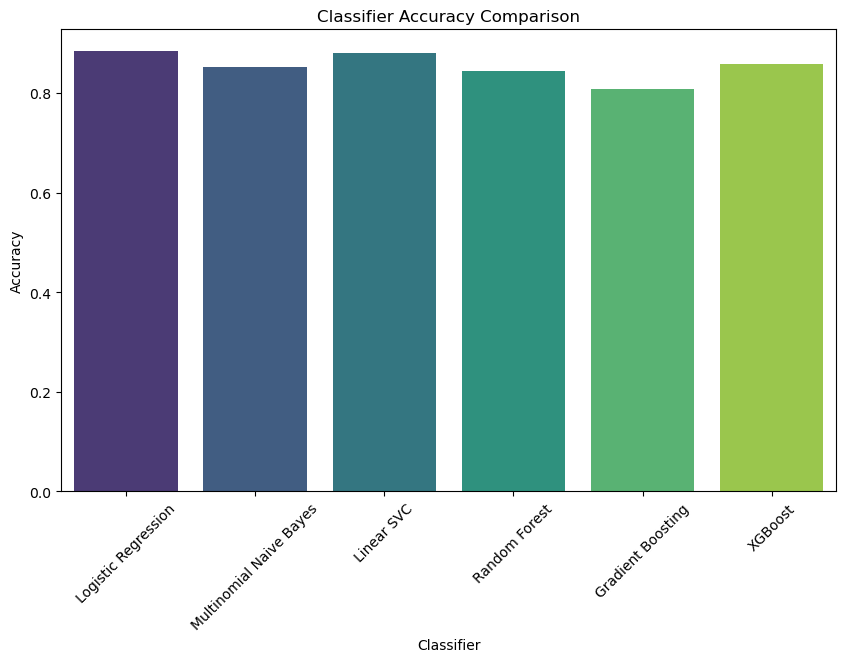

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming accuracy_results
accuracy_results = {
    'Logistic Regression': 0.8833,
    'Multinomial Naive Bayes': 0.8525,
    'Linear SVC': 0.8801,
    'Random Forest': 0.8446,
    'Gradient Boosting': 0.8088,
    'XGBoost': 0.8575
}

# Convert the dictionary to a DataFrame for easier plotting
df = pd.DataFrame(list(accuracy_results.items()), columns=['Classifier', 'Accuracy'])

# Vertical bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='Classifier', y='Accuracy', data=df, palette='viridis')
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)  # Rotate x-axis labels 
plt.show()

# 2.Radar Chart

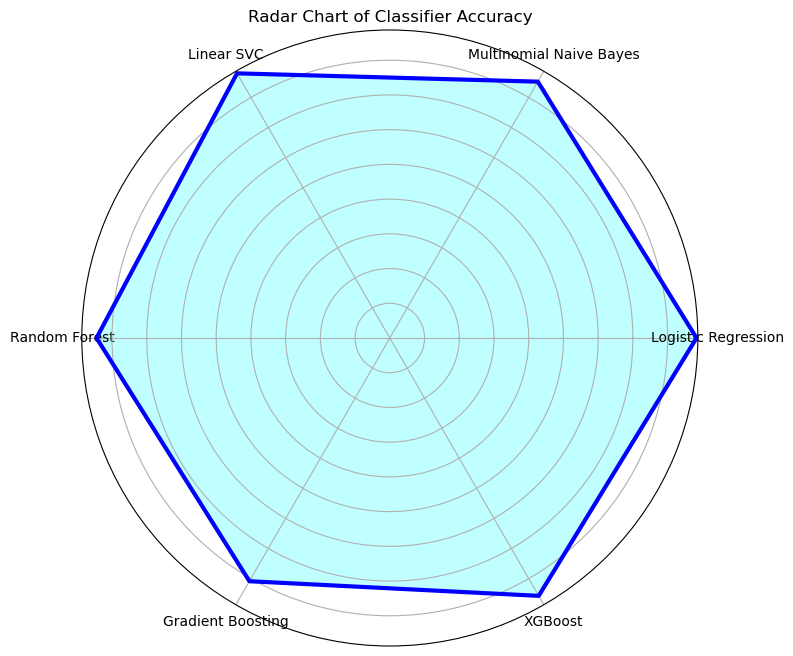

In [48]:
import numpy as np

# Extract classifier names and accuracy values
categories = list(accuracy_results.keys())
accuracy = list(accuracy_results.values())

# Number of classifiers
N = len(categories)

# Compute angle for each classifier
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

# Repeat the first value to close the circle
accuracy += accuracy[:1]
angles += angles[:1]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot the data
ax.fill(angles, accuracy, color='cyan', alpha=0.25)
ax.plot(angles, accuracy, color='blue', linewidth=3)

# Set the labels
ax.set_yticklabels([])  # Hide the radial labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

plt.title('Radar Chart of Classifier Accuracy')
plt.show()

# 3.Scatter plot

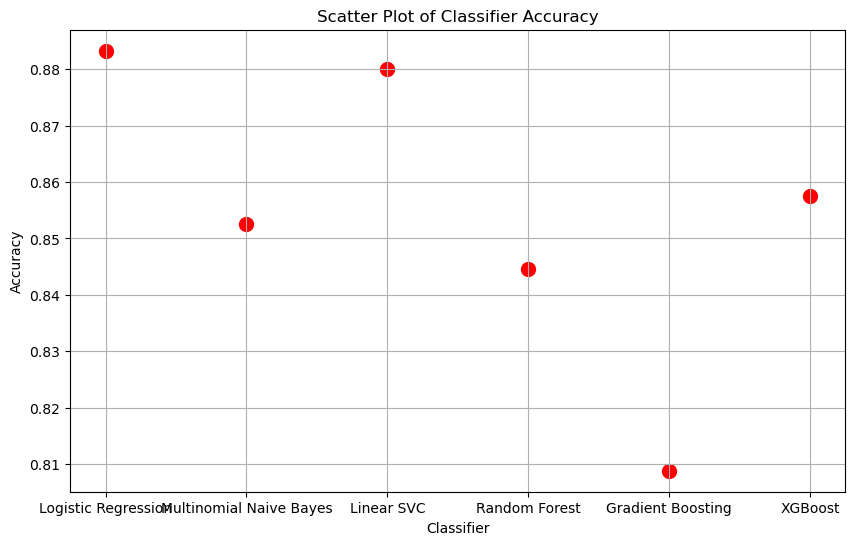

In [49]:
# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(accuracy_results.keys(), accuracy_results.values(), color='red', s=100, label='Accuracy')

# Add titles and labels
plt.title('Scatter Plot of Classifier Accuracy')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')

# Show grid and plot
plt.grid(True)
plt.show()

# 4. Line graph

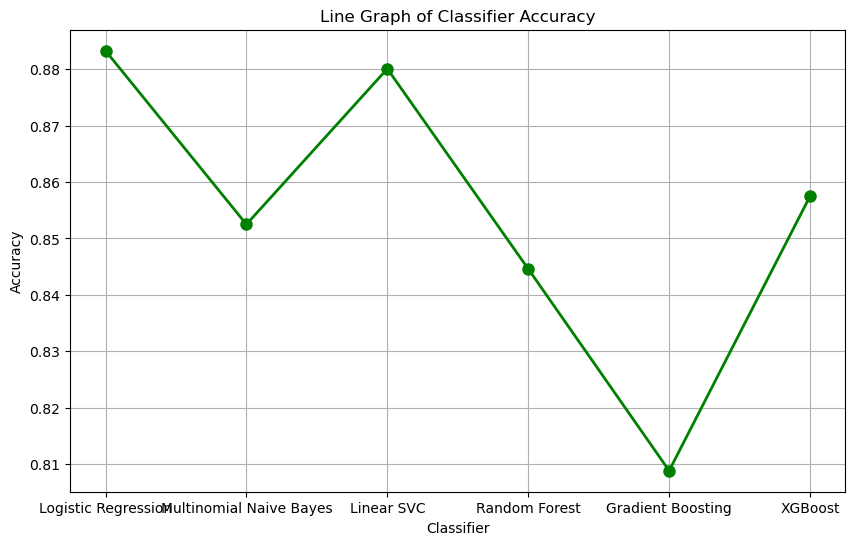

In [50]:
# Line graph
plt.figure(figsize=(10,6))
plt.plot(list(accuracy_results.keys()), list(accuracy_results.values()), marker='o', color='green', linewidth=2, markersize=8)

# Add titles and labels
plt.title('Line Graph of Classifier Accuracy')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')

# Show grid and plot
plt.grid(True)
plt.show()

# SPRINT 3

# 1. Importing Libraries

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler

# 2. Loading Dataset

In [74]:
df = pd.read_csv("IMDB Dataset.csv")
print("Dataset Loaded Successfully!\n")
print(df.head())

Dataset Loaded Successfully!

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


# 3. Data Preprocessing

In [75]:
print("\nData Preprocessing...")
pos_reviews = df[df['sentiment']=='positive'].sample(9000, random_state=42)
neg_reviews = df[df['sentiment']=='negative'].sample(1000, random_state=42)
balanced_df = pd.concat([pos_reviews, neg_reviews]).sample(frac=1, random_state=42)


Data Preprocessing...


# 4. Visualize Class Distribution

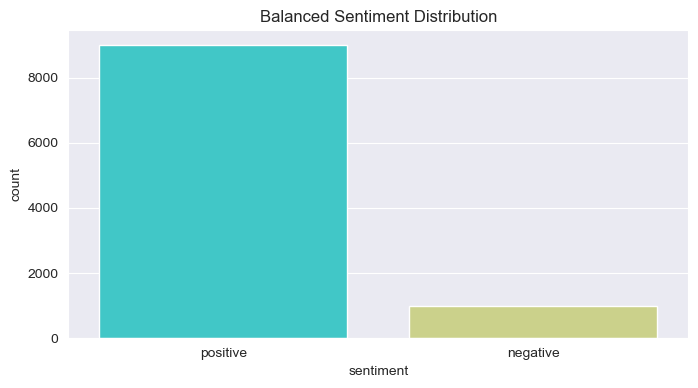

In [76]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 4))
sns.countplot(data=balanced_df, x='sentiment', palette='rainbow')
plt.title('Balanced Sentiment Distribution')
plt.savefig('sentiment_distribution.png')
plt.show()

# 5. Handling Data Imbalance

In [77]:
rus = RandomUnderSampler(random_state=42)
balanced_X, balanced_y = rus.fit_resample(balanced_df[['review']], balanced_df['sentiment'])
balanced_df = pd.DataFrame({'review': balanced_X['review'], 'sentiment': balanced_y})
print("Data Balancing Completed!\n")

Data Balancing Completed!



C:\Users\sidba\anaconda3\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\sidba\anaconda3\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


# 6. Splitting the Data

In [78]:
train, test = train_test_split(balanced_df, test_size=0.3, random_state=42)
train_X, train_y = train['review'], train['sentiment']
test_X, test_y = test['review'], test['sentiment']

# 7. Feature Extraction Using TF-IDF

In [83]:
print("\nExtracting Features...")
tfidf = TfidfVectorizer(stop_words='english')
train_X_vector = tfidf.fit_transform(train_X)
test_X_vector = tfidf.transform(test_X)
print("Feature Extraction Completed!\n")


Extracting Features...
Feature Extraction Completed!



# 8. Model Training and Evaluation

In [88]:
print(test_X_vector.shape)  


(600, 20801)


In [89]:
pred_y = model.predict(test_X_vector) 
print(len(pred_y))  

600


In [91]:
# Check the split
print(train.shape, test.shape)  # Ensure both train and test have the correct number of samples
print(train_y[:5], test_y[:5])  # Check the first few labels of train_y and test_y

# Ensure that test_y has 600 samples
train, test = train_test_split(balanced_df, test_size=0.3, random_state=42)
train_X, train_y = train['review'], train['sentiment']
test_X, test_y = test['review'], test['sentiment']

# Check lengths again
print("Length of train_y:", len(train_y))
print("Length of test_y:", len(test_y))

# Feature extraction process (TF-IDF)
print("\nExtracting Features...")
tfidf = TfidfVectorizer(stop_words='english')
train_X_vector = tfidf.fit_transform(train_X)
test_X_vector = tfidf.transform(test_X)

# Model training loop
for name, model in models.items():
    if name == 'NaiveBayes':
        model.fit(train_X_vector.toarray(), train_y)  # NaiveBayes might need a dense matrix
        pred_y = model.predict(test_X_vector.toarray())  # Ensure NaiveBayes uses dense format
    else:
        model.fit(train_X_vector, train_y)
        pred_y = model.predict(test_X_vector)
    
    # Ensure the length of predictions matches the test set
    print(f"Length of test_y: {len(test_y)}")  # Should be 600
    print(f"Length of pred_y: {len(pred_y)}")  # Should be 600

    if len(test_y) == len(pred_y):
        print(classification_report(test_y, pred_y, labels=['positive', 'negative']))
        print("F1 Score:", f1_score(test_y, pred_y, labels=['positive', 'negative'], average=None))
    else:
        print("Error: The number of test samples and predictions do not match.")


(1400, 2) (600, 2)
26086    negative
15575    negative
45696    negative
24141    positive
15215    positive
Name: sentiment, dtype: object ['positive', 'negative']
Length of train_y: 1400
Length of test_y: 600

Extracting Features...
Length of test_y: 600
Length of pred_y: 600
              precision    recall  f1-score   support

    positive       0.80      0.89      0.84       298
    negative       0.87      0.78      0.83       302

    accuracy                           0.83       600
   macro avg       0.84      0.83      0.83       600
weighted avg       0.84      0.83      0.83       600

F1 Score: [0.84076433 0.82517483]
Length of test_y: 600
Length of pred_y: 600
              precision    recall  f1-score   support

    positive       0.63      0.68      0.65       298
    negative       0.66      0.61      0.63       302

    accuracy                           0.64       600
   macro avg       0.64      0.64      0.64       600
weighted avg       0.64      0.64      0.64 

# 9. Confusion Matrix Visualization

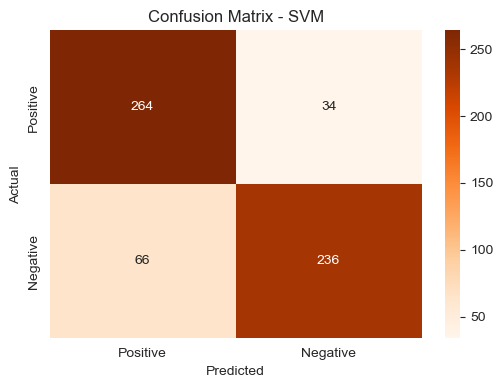

In [92]:
conf_mat = confusion_matrix(test_y, models['SVM'].predict(test_X_vector), labels=['positive', 'negative'])
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Oranges', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_svm.png')
plt.show()

# 10. Hyperparameter Tuning Using GridSearchCV

In [93]:
print("\nHyperparameter Tuning...")
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svc = SVC()
svc_grid = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', verbose=3)
svc_grid.fit(train_X_vector, train_y)

print(f"Best Parameters: {svc_grid.best_params_}")
print(f"Best Score: {svc_grid.best_score_}\n")


Hyperparameter Tuning...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.521 total time=   1.1s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.521 total time=   1.1s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.511 total time=   1.2s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.511 total time=   1.5s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.514 total time=   1.1s
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.500 total time=   1.1s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.500 total time=   1.0s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.500 total time=   1.1s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.504 total time=   1.2s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.504 total time=   1.0s
[CV 1/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.521 total time=   1.1s
[CV 2/5] END ..C=0.1, 

In [94]:
optimized_model = svc_grid.best_estimator_
pred_y_optimized = optimized_model.predict(test_X_vector)

In [95]:
print("\nOptimized Model Evaluation")
print(classification_report(test_y, pred_y_optimized, labels=['positive', 'negative']))
print("Accuracy:", optimized_model.score(test_X_vector, test_y))


Optimized Model Evaluation
              precision    recall  f1-score   support

    positive       0.79      0.88      0.83       298
    negative       0.87      0.77      0.82       302

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600

Accuracy: 0.8266666666666667


# 12. Stacking Classifier Evaluation

In [96]:
estimators = [
    ('DecisionTree', DecisionTreeClassifier()),
    ('NaiveBayes', GaussianNB()),
    ('RandomForest', RandomForestClassifier(n_estimators=100, random_state=42))
]

stack_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=1000))
stack_model.fit(train_X_vector.toarray(), train_y)
stack_acc = stack_model.score(test_X_vector.toarray(), test_y)

In [97]:
print("\nStacking Classifier Evaluation")
print("Accuracy:", stack_acc)
stack_report = classification_report(test_y, stack_model.predict(test_X_vector.toarray()), labels=['positive', 'negative'])
print(stack_report)


Stacking Classifier Evaluation
Accuracy: 0.81
              precision    recall  f1-score   support

    positive       0.80      0.82      0.81       298
    negative       0.82      0.80      0.81       302

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600



# 13. Comparison of Models

In [98]:
print("\nModel Comparison:")
print(f"Best SVC Model Accuracy: {optimized_model.score(test_X_vector, test_y):.2f}")
print(f"Stacking Classifier Accuracy: {stack_acc:.2f}")


Model Comparison:
Best SVC Model Accuracy: 0.83
Stacking Classifier Accuracy: 0.81


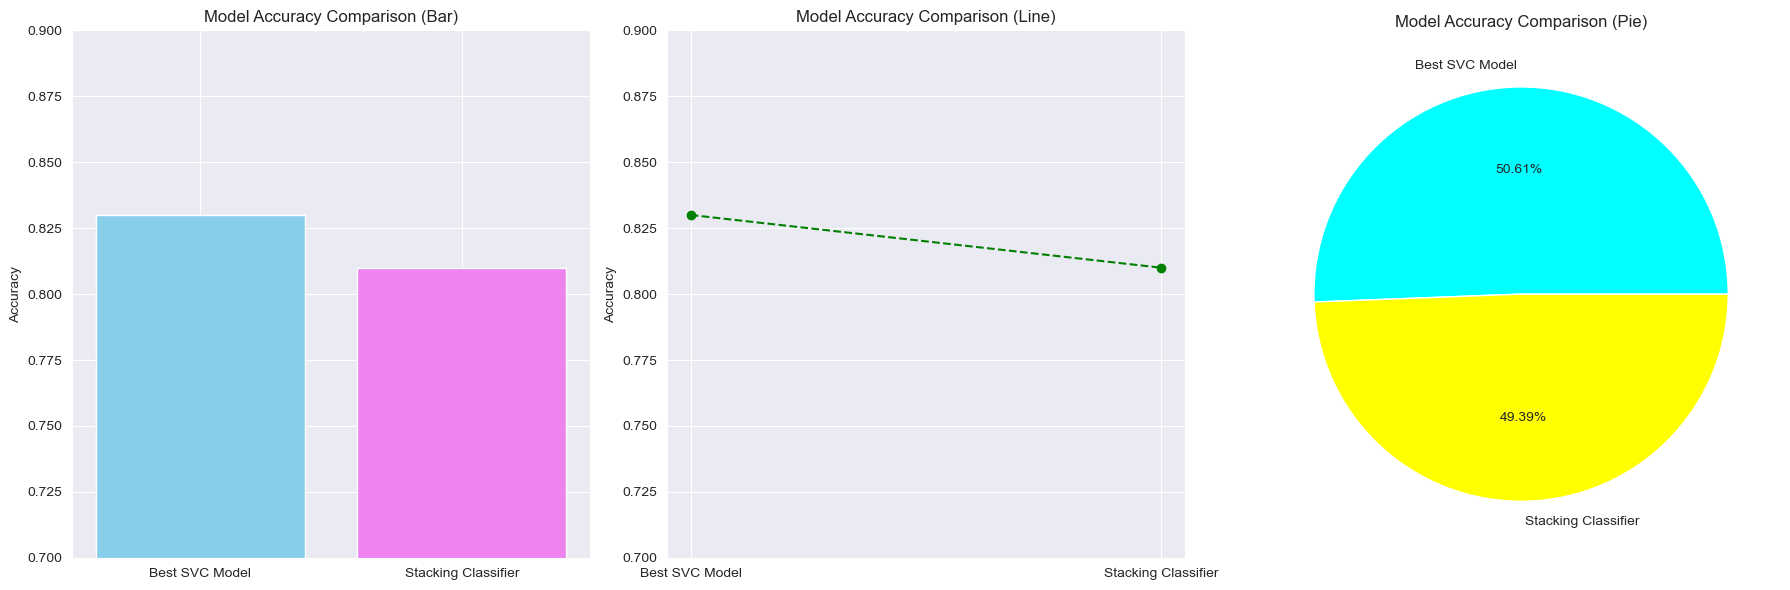

In [99]:
models = ['Best SVC Model', 'Stacking Classifier']
accuracies = [0.83, 0.81]

# Creating subplots for visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Bar Graph
axes[0].bar(models, accuracies, color=['skyblue', 'violet'])
axes[0].set_title('Model Accuracy Comparison (Bar)')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0.7, 0.9)

# Line Graph
axes[1].plot(models, accuracies, marker='o', color='green', linestyle='--')
axes[1].set_title('Model Accuracy Comparison (Line)')
axes[1].set_ylabel('Accuracy')
axes[1].set_ylim(0.7, 0.9)

# Pie Chart
axes[2].pie(accuracies, labels=models, autopct='%1.2f%%', colors=['cyan', 'yellow'])
axes[2].set_title('Model Accuracy Comparison (Pie)')

# Display the graphs
plt.tight_layout()
plt.show()